# Cactus plots

Plus d'information dans le README du dossier [courant](./).

## Imports nécessaires

In [1]:
from metrics.wallet import *
from common import *
import matplotlib.pyplot as plt

## Constantes locales

In [2]:
MAP_NAME = {
    'orig': '$\mathtt{original}$',
    'egreedy': '$\mathtt{\\varepsilon\\textrm{-}Greedy}$',
    'EGreedy': '$\mathtt{\\varepsilon\\textrm{-}Greedy}$',
    'ts': '$\mathtt{TS}$',
    'ucb': '$\mathtt{UCB1}$',
    'UCB': '$\mathtt{UCB1}$',
    'moss': '$\mathtt{MOSS}$',
    'exp3': '$\mathtt{EXP3}$',
    'EXP3': '$\mathtt{EXP3}$',
    'st': '$\mathtt{ST}$',
}

MAP_COLOR = {
    '$\\mathtt{\\varepsilon\\textrm{-}Greedy}$': c[6],
    '$\\mathtt{UCB1}$': c[5],
    '$\\mathtt{EXP3}$': c[4],
    '$\\mathtt{MOSS}$': c[3],
    '$\\mathtt{TS}$': c[2],
    '$\\mathtt{ST}$': c[0],
    '$\\mathtt{original}$': c[1]
}

## Analyse importée!

In [3]:
analysis = import_analysis_from_file(ANALYSIS_08_ESB_MERGE)

In [4]:
def f(x):
    if 'impact' in x:
        return 'impact'
    if 'activity' in x:
        return 'activity'
    if 'domddeg' in x or 'ddegondom' in x:
        return 'domddeg'
    if 'chs' in x:
        return 'chs'
    if 'cacd' in x:
        return 'cacd'
    
def f2(x):
    if 'egreedy' in x:
        return 'egreedy'
    if 'ucb' in x:
        return 'ucb'
    if 'exp3' in x:
        return 'exp3'
    if 'moss' in x:
        return 'moss'
    if 'ts' in x:
        return 'ts'
    if 'st' in x:
        return 'st'
    return 'orig'

analysis = analysis.add_variable(
    'h',
    lambda x: f(x['experiment_ware'])
)

analysis = analysis.add_variable(
    'experiment_ware',
    lambda x: MAP_NAME[f2(x['experiment_ware'])]
)

In [5]:
analysis.data_frame

input                         experiment_ware  \
0      MisteryShopper-10b_c18  $\mathtt{\varepsilon\textrm{-}Greedy}$   
1      MisteryShopper-10b_c18                         $\mathtt{UCB1}$   
2      MisteryShopper-10b_c18                         $\mathtt{EXP3}$   
3      MisteryShopper-10b_c18                         $\mathtt{MOSS}$   
4      MisteryShopper-10b_c18                         $\mathtt{EXP3}$   
...                       ...                                     ...   
28345    Rlfap-scen-09-w1-f03                     $\mathtt{original}$   
28346    Rlfap-scen-09-w1-f03                     $\mathtt{original}$   
28347    Rlfap-scen-09-w1-f03                     $\mathtt{original}$   
28348    Rlfap-scen-09-w1-f03                     $\mathtt{original}$   
28349    Rlfap-scen-09-w1-f03                     $\mathtt{original}$   

         cpu_time         status exception  timeout  success  user_success  \
0         3.68144    SATISFIABLE       NaN   1200.0     True          True   
1        92.32630    SATISFIABLE       NaN   1200.0     True          True   
2         3.83362    SATISFIABLE       NaN   1200.0     True          True   
3        11.34990    SATISFIABLE       NaN   1200.0     True          True   
4         3.79784    SATISFIABLE       NaN   1200.0     True          True   
...           ...            ...       ...      ...      ...           ...   
28345  2400.00000        UNKNOWN       NaN   2400.0    False         False   
28346  2400.00000        UNKNOWN       NaN   2400.0    False         False   
28347     5.15288  UNSATISFIABLE       NaN   2400.0     True          True   
28348     5.10724  UNSATISFIABLE       NaN   2400.0     True          True   
28349     5.26996  UNSATISFIABLE       NaN   2400.0     True          True   

       missing  consistent_xp  consistent_input  error old_experiment_ware  \
0        False           True              True  False                 NaN   
1        False           True              True  False                 NaN   
2        False           True              True  False                 NaN   
3        False           True              True  False                 NaN   
4        False           True              True  False                 NaN   
...        ...            ...               ...    ...                 ...   
28345    False           True              True  False              impact   
28346    False           True              True  False             domddeg   
28347    False           True              True  False            activity   
28348    False           True              True  False                 chs   
28349    False           True              True  False                cacd   

              h  
0        impact  
1       domddeg  
2        impact  
3       domddeg  
4          cacd  
...         ...  
28345    impact  
28346   domddeg  
28347  activity  
28348       chs  
28349      cacd  

[28350 rows x 14 columns]

## Statistiques globales par solveur

activity


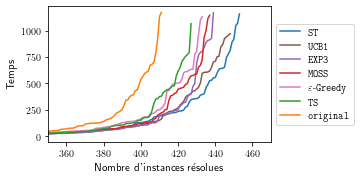

cacd


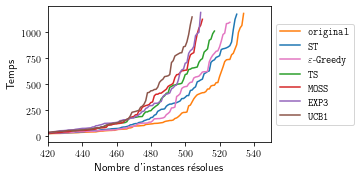

chs


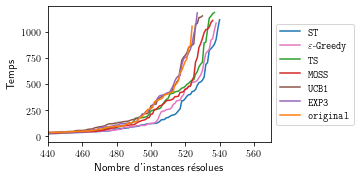

domddeg


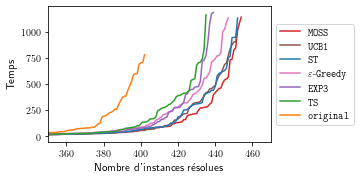

impact


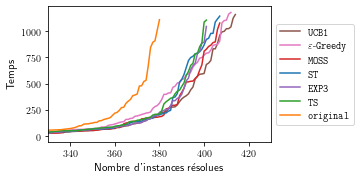

In [7]:
size = {
    'activity': (350, 470),
    'cacd': (420, 550),
    'chs': (440, 570),
    'domddeg': (350, 470),
    'impact': (330, 430),
}

for sub in analysis.groupby('h'):
    h = sub.data_frame.h.unique()[0]
    print(h)
    
    sub.cactus_plot(
        # Cactus plot specificities
        cumulated=False,
        cactus_col='cpu_time',
        show_marker=False,

        # Figure size
        figure_size=(4, 2.5),

        # Titles
        title='',
        x_axis_name='Nombre d\'instances résolues',
        y_axis_name='Temps',

        # Axis limits
        x_min=size[h][0],
        x_max=size[h][1],
        y_min=None,
        y_max=None,

        # Axis scaling
        logx=False,
        logy=False,

        # Legend parameters
        legend_location=Position.RIGHT,
        legend_offset=(-0.1, 0),
        ncol_legend=1,

        # Style mapping
        color_map=MAP_COLOR,
        #style_map=R_STYLE_MAP,

        # Title font styles
        #title_font_name='Times New Roman',
        title_font_color='#000000',
        title_font_size=11,
        title_font_weight=FontWeight.BOLD,

        # Label font styles
        #label_font_name='Times New Roman',
        label_font_color='#000000',
        label_font_size=11,
        label_font_weight=FontWeight.BOLD,

        # Others
        latex_writing=True,
        output=f"fig/2A-{h}.pdf",
        dynamic=False
    )
    plt.show()
    